In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d nagraj0308/dogs-vs-cats-small

  0% 0.00/838k [00:00<?, ?B/s]
100% 838k/838k [00:00<00:00, 75.3MB/s]


In [ ]:
!unzip dogs-vs-cats-small.zip

Archive:  dogs-vs-cats-small.zip
  inflating: test/0.jpg              
  inflating: test/1.jpg              
  inflating: test/10.jpg             
  inflating: test/11.jpg             
  inflating: test/12.jpg             
  inflating: test/13.jpg             
  inflating: test/14.jpg             
  inflating: test/15.jpg             
  inflating: test/16.jpg             
  inflating: test/17.jpg             
  inflating: test/2.jpg              
  inflating: test/3.jpg              
  inflating: test/4.jpg              
  inflating: test/5.jpg              
  inflating: test/6.jpg              
  inflating: test/7.jpg              
  inflating: test/8.jpg              
  inflating: test/9.jpg              
  inflating: train/cat.0.jpg         
  inflating: train/cat.1.jpg         
  inflating: train/cat.2.jpg         
  inflating: train/cat.3.jpg         
  inflating: train/cat.4.jpg         
  inflating: train/cat.5.jpg         
  inflating: train/cat.6.jpg         
  inflating: trai

In [ ]:
import cv2
import os
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [ ]:
def load_images_from_folder(folder):
    images = []
    labels = []
    for filename in os.listdir(folder):
        label = 0 if 'cat' in filename else 1  # Assuming 'cat' is class 0 and 'dog' is class 1
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (50, 50))
        images.append(img.flatten())
        labels.append(label)
    return images, labels

In [ ]:
# Load training data
train_folder = '/content/train'
X_train, y_train = load_images_from_folder(train_folder)

# Load testing data
test_folder = '/content/test'
X_test, y_test = load_images_from_folder(test_folder)

In [ ]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
clf = svm.SVC(kernel='linear')

In [ ]:
# Train the classifier
clf.fit(X_train_scaled, y_train)


SVC(kernel='linear')

In [ ]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Model accuracy on the test set: {accuracy * 100:.2f}%')

Model accuracy on the test set: 61.11%


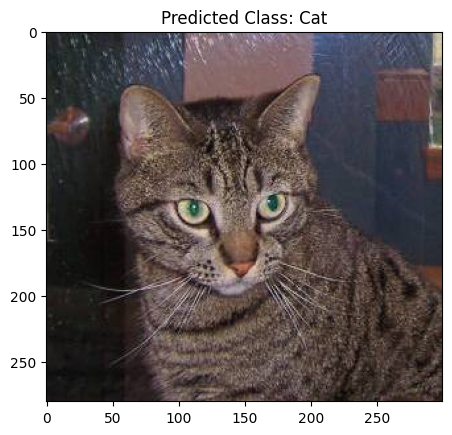

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (50, 50))
    return img.flatten()

def predict_image(image_path):
    # Preprocess the image
    new_feature_vector = preprocess_image(image_path)

    # Reshape the feature vector to match the training data
    new_feature_vector = np.array(new_feature_vector).reshape(1, -1)

    # Make predictions
    prediction = clf.predict(new_feature_vector)

    # Output the result
    if prediction[0] == 0:
        return "Cat"
    else:
        return "Dog"

# Demo
new_image_path = '/content/train/.1.jpg'
prediction_result = predict_image(new_image_path)

# Display the image
img = cv2.imread(new_image_path)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title(f'Predicted Class: {prediction_result}')
plt.show()
